# Population from South Asia over time by district and Neighborhood in Ciutat Vella

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [13]:
# Aggregate by neighborhood and year
data_path =  '../data/merged_data/merged_birthPlaceRegion_sex.csv'
data_region = pd.read_csv(data_path)
# Get only data from Southern Asia for clarity
data_region = data_region[data_region['Birth_Place_Region'] == 'Southern Asia']
df_heat = data_region.groupby(['Year_Reference', 'District'], as_index=False)['Value'].sum()
# Filter for Ciutat Vella district
data_ciutat_vella = data_region[data_region['District'] == 'Ciutat Vella']
# Filter for Southern Asia
data_southern_asia = data_ciutat_vella[data_ciutat_vella['Birth_Place_Region'] == 'Southern Asia']
df_heat2 = data_southern_asia.groupby(['Year_Reference', 'Neighborhood'], as_index=False)['Value'].sum()

# Pivot for heatmap
df_pivot = df_heat.pivot(index='District', columns='Year_Reference', values='Value')
df_pivot2 = df_heat2.pivot(index='Neighborhood', columns='Year_Reference', values='Value')

In [14]:
# Use colorblind-friendly coherent colormap
cmap = "magma"

# Generate a colorblind-safe palette from magma (one color per neighborhood)
num_neigh = df_pivot2.shape[0]
colors = cm.get_cmap("magma")(np.linspace(0.25, 0.95, num_neigh))

/var/folders/02/v80wkxvx5h353nfck_r_wgzc0000gn/T/ipykernel_67584/3134617631.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("magma")(np.linspace(0.25, 0.95, num_neigh))


### Linear Color Map

/var/folders/02/v80wkxvx5h353nfck_r_wgzc0000gn/T/ipykernel_67584/2243524887.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("magma")(np.linspace(0.25, 0.95, num_neigh))


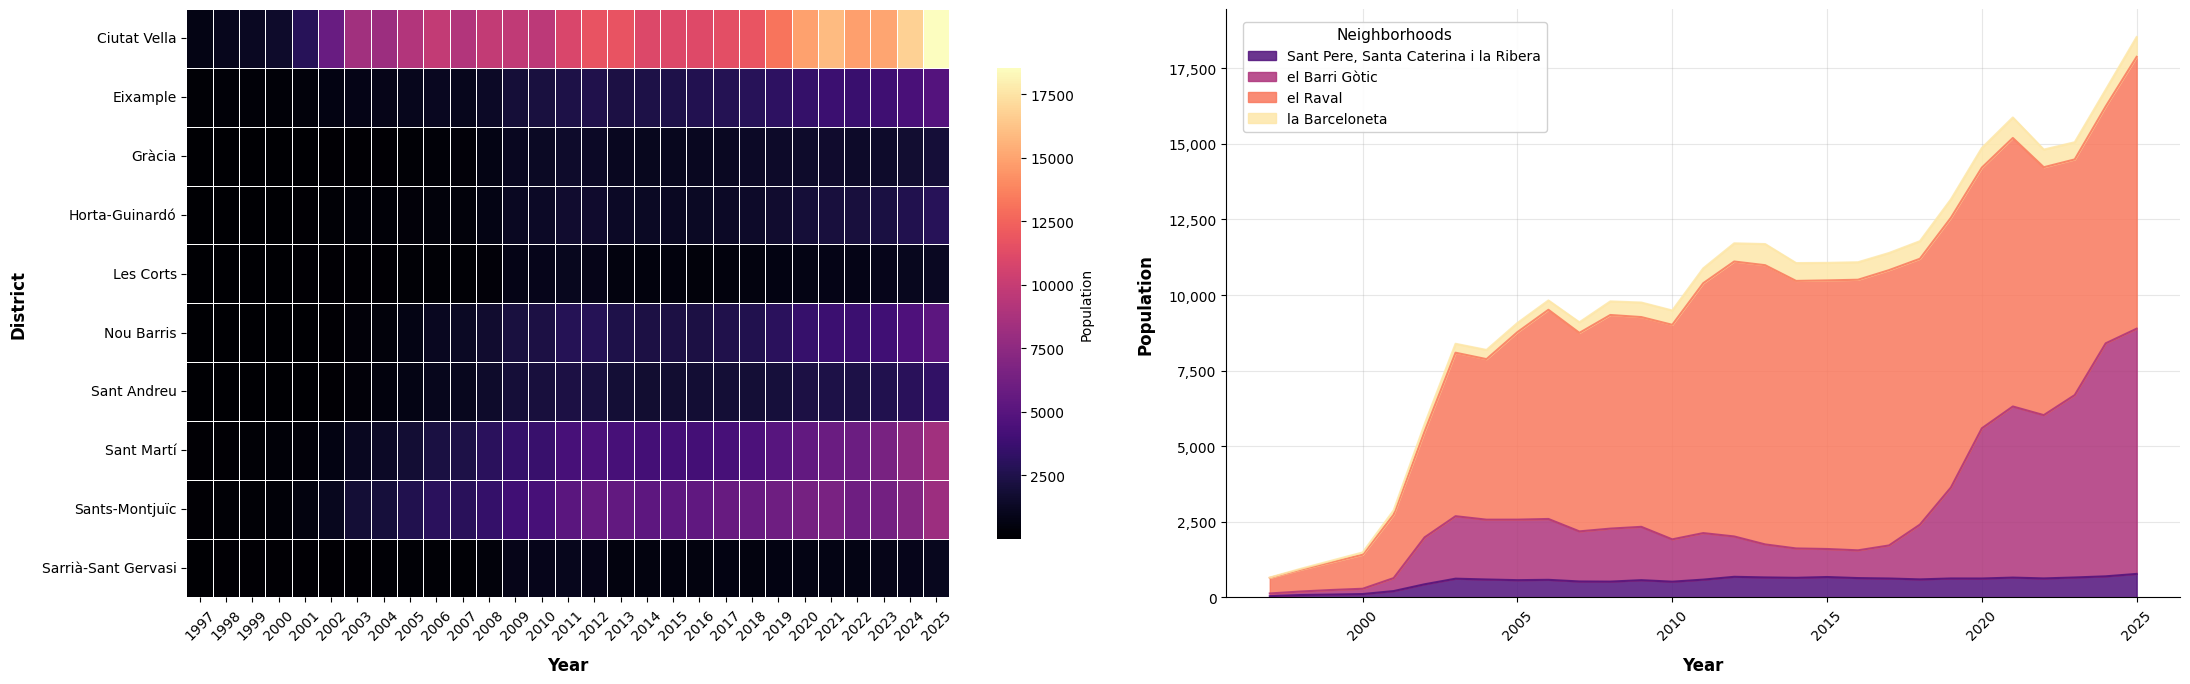

In [15]:
# Set up professional style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with light background - adjust width for better line plot visibility
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))
fig.patch.set_facecolor('white')


# Left subplot - Districts
heat1 = sns.heatmap(
    df_pivot,
    cmap=cmap,
    linewidths=0.5,
    linecolor='white',
    ax=ax1,
    annot=False,
    fmt='.0f',
    annot_kws={'size': 9, 'color': 'white', 'weight': 'bold'},
    cbar_kws={'label': 'Population', 'shrink': 0.8}
)

ax1.set_xlabel('Year', fontsize=12, fontweight='semibold', labelpad=10)
ax1.set_ylabel('District', fontsize=12, fontweight='semibold', labelpad=10)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)


# RIGHT SUBPLOT - Neighborhoods (stacked area chart)
# Prepare data for stacked area chart
stacked_data = df_pivot2.T  # years as rows

# Coherent colorblind-friendly palette sampled from MAGMA
num_neigh = df_pivot2.shape[0]
colors = cm.get_cmap("magma")(np.linspace(0.25, 0.95, num_neigh))

# Stacked area chart
stacked_data.plot.area(ax=ax2, color=colors, alpha=0.85)

ax2.set_xlabel('Year', fontsize=12, fontweight='semibold', labelpad=10)
ax2.set_ylabel('Population', fontsize=12, fontweight='semibold', labelpad=10)
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Grid for readability
ax2.grid(True, alpha=0.3, axis='both')
ax2.set_axisbelow(True)

# Move legend to **top-left INSIDE** the plot
ax2.legend(
    fontsize=10,
    frameon=True,
    fancybox=True,
    shadow=False,
    framealpha=0.9,
    loc='upper left',        # <- INSIDE the plot
    bbox_to_anchor=(0.01, 0.99),
    title='Neighborhoods',
    title_fontsize=11
)

# Clean spines
for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)


plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save figure
plt.savefig('../data/outputs/good/southern_asia_population_heatmap_good.png', 
            dpi=300, bbox_inches='tight', facecolor='white', 
            transparent=False, edgecolor='none')
plt.show()

### Log Color Map

/var/folders/02/v80wkxvx5h353nfck_r_wgzc0000gn/T/ipykernel_67584/1704697703.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("magma")(np.linspace(0.25, 0.95, num_neigh))


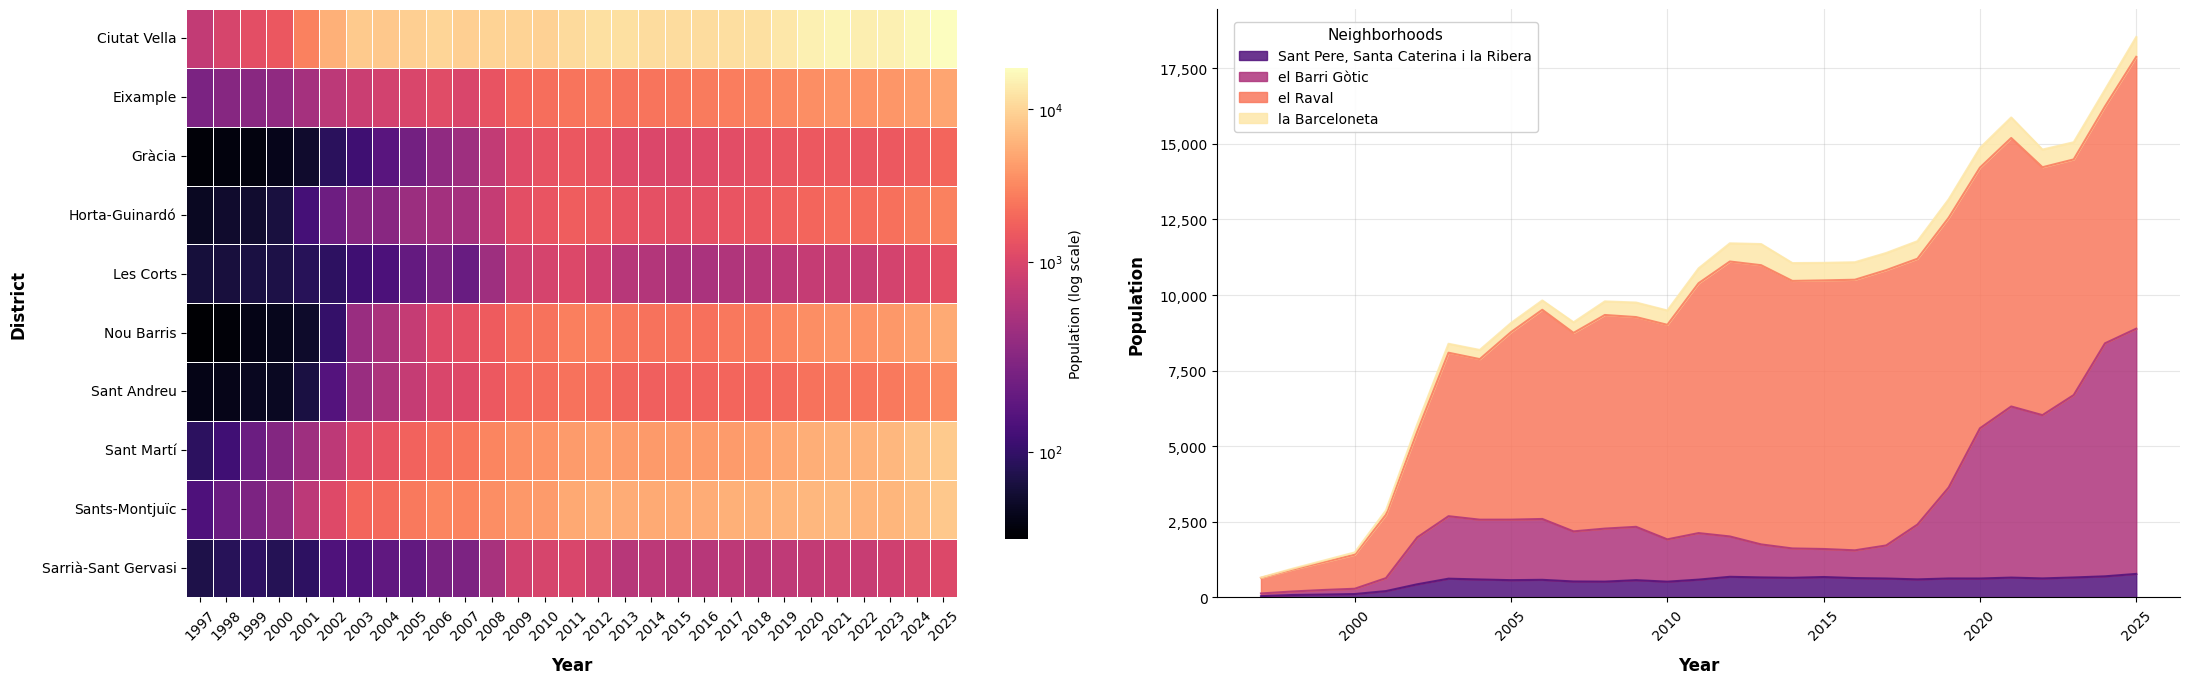

In [16]:
# Set up professional style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with light background - adjust width for better line plot visibility
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))
fig.patch.set_facecolor('white')

# Calculate appropriate parameters for SymLogNorm
data_min = df_pivot.min().min()
data_max = df_pivot.max().max()

# Use SymLogNorm with a linear threshold for small values
linthresh = max(1, data_max * 0.01)  # 1% of max value or 1, whichever is larger

# Left subplot - Districts with SymLogNorm
heat1 = sns.heatmap(
    df_pivot,
    cmap=cmap,
    linewidths=0.5,
    linecolor='white',
    ax=ax1,
    annot=False,
    fmt='.0f',
    annot_kws={'size': 9, 'color': 'white', 'weight': 'bold'},
    cbar_kws={'label': 'Population (log scale)', 'shrink': 0.8},
    norm=mcolors.SymLogNorm(linthresh=linthresh, vmin=data_min, vmax=data_max)
)

ax1.set_xlabel('Year', fontsize=12, fontweight='semibold', labelpad=10)
ax1.set_ylabel('District', fontsize=12, fontweight='semibold', labelpad=10)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)


# RIGHT SUBPLOT - Neighborhoods (stacked area chart)
# Prepare data for stacked area chart
stacked_data = df_pivot2.T  # years as rows

# Coherent colorblind-friendly palette sampled from MAGMA
num_neigh = df_pivot2.shape[0]
colors = cm.get_cmap("magma")(np.linspace(0.25, 0.95, num_neigh))

# Stacked area chart
stacked_data.plot.area(ax=ax2, color=colors, alpha=0.85)

ax2.set_xlabel('Year', fontsize=12, fontweight='semibold', labelpad=10)
ax2.set_ylabel('Population', fontsize=12, fontweight='semibold', labelpad=10)
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Grid for readability
ax2.grid(True, alpha=0.3, axis='both')
ax2.set_axisbelow(True)


# Move legend to **top-left INSIDE** the plot
ax2.legend(
    fontsize=10,
    frameon=True,
    fancybox=True,
    shadow=False,
    framealpha=0.9,
    loc='upper left',        # <- INSIDE the plot
    bbox_to_anchor=(0.01, 0.99),
    title='Neighborhoods',
    title_fontsize=11
)

# Clean spines
for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)


plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save figure
plt.savefig('../data/outputs/good/southern_asia_population_heatmap_good_log.png', 
            dpi=300, bbox_inches='tight', facecolor='white', 
            transparent=False, edgecolor='none')
plt.show()

Bigger font for Presentation:

/var/folders/02/v80wkxvx5h353nfck_r_wgzc0000gn/T/ipykernel_67584/2106501174.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("magma")(np.linspace(0.25, 0.95, num_neigh))


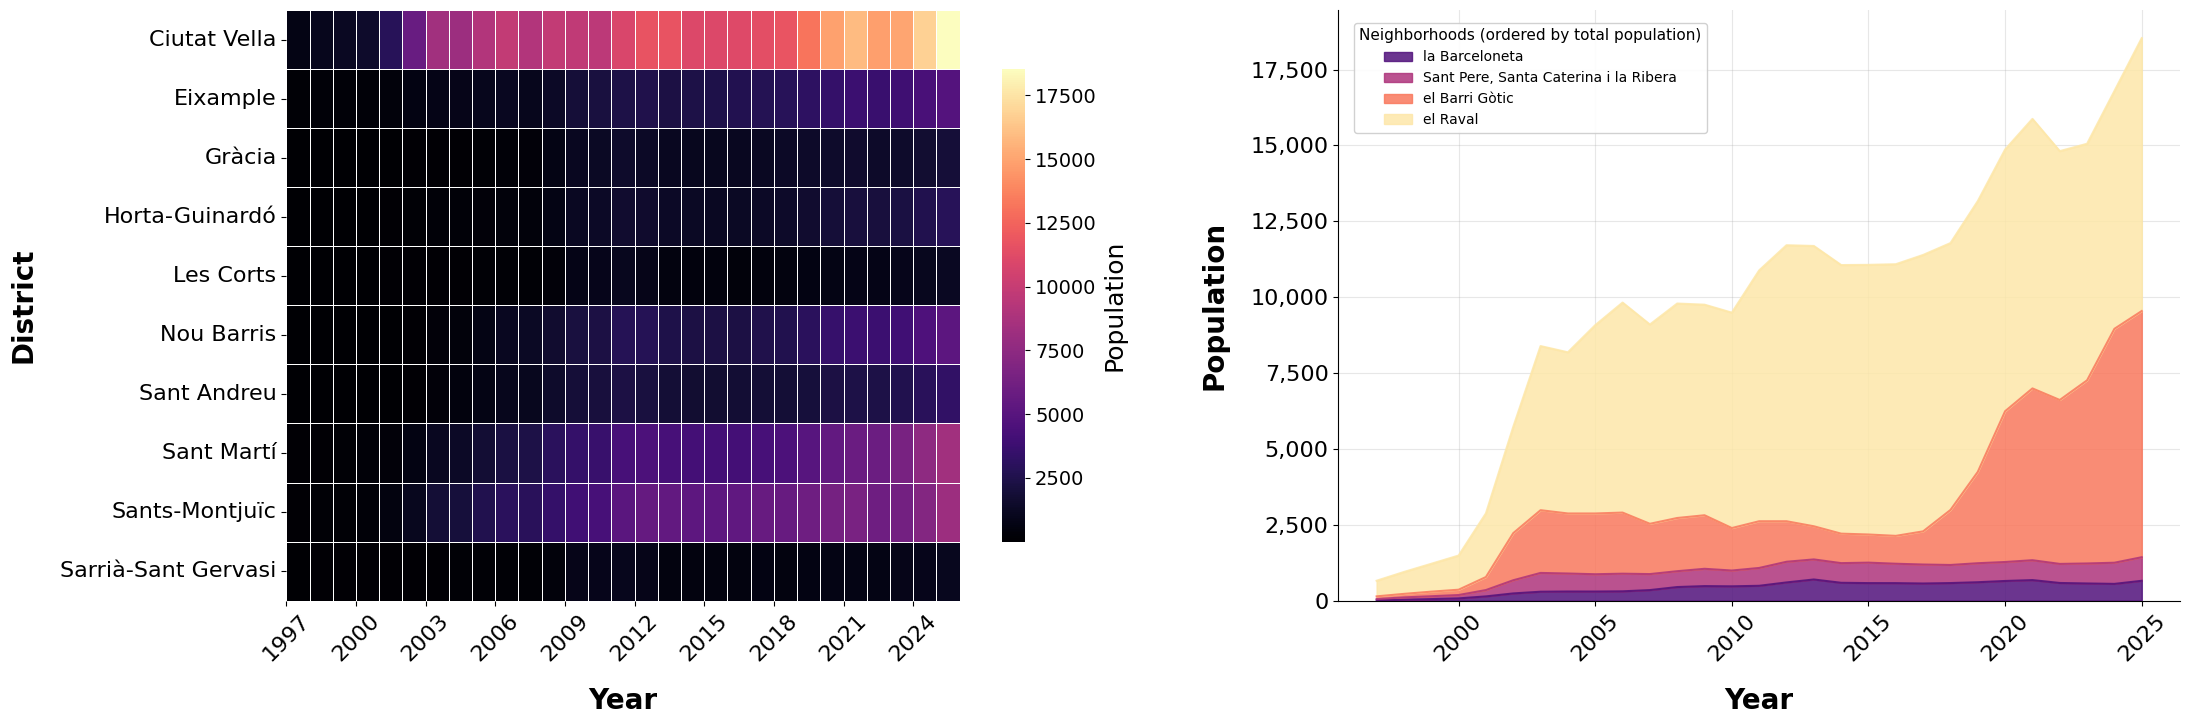

In [17]:
# Set up professional style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with light background - adjust width for better line plot visibility
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))
fig.patch.set_facecolor('white')


# Left subplot - Districts
heat1 = sns.heatmap(
    df_pivot,
    cmap=cmap,
    linewidths=0.5,
    linecolor='white',
    ax=ax1,
    annot=False,
    fmt='.0f',
    annot_kws={'size': 9, 'color': 'white', 'weight': 'bold'},
    cbar_kws={'label': 'Population', 'shrink': 0.8}
)
# Enlarge colorbar font
heat1.collections[0].colorbar.ax.tick_params(labelsize=14)
heat1.collections[0].colorbar.ax.yaxis.label.set_size(18)

ax1.set_xlabel('Year', fontsize=20, fontweight='bold', labelpad=16)
ax1.set_ylabel('District', fontsize=20, fontweight='bold', labelpad=16)
ax1.tick_params(axis='x', rotation=45, labelsize=16)
ax1.tick_params(axis='y', rotation=0, labelsize=16)


# Reduce x-axis ticks only for left heatmap
years = df_pivot.columns
if len(years) > 10:
    selected_years = years[::3]  # Show every 3rd year if many years
else:
    selected_years = years[::2]  # Show every 2nd year if moderate number

ax1.set_xticks([list(years).index(year) for year in selected_years])
ax1.set_xticklabels(selected_years)


# RIGHT SUBPLOT - Neighborhoods (stacked area chart)
# Prepare data for stacked area chart
stacked_data = df_pivot2.T  # years as rows

# Calculate total population for each neighborhood to sort by size
neighborhood_totals = df_pivot2.sum(axis=1)  # Sum across years for each neighborhood
sorted_neighborhoods = neighborhood_totals.sort_values(ascending=True)  # Sort from smallest to largest

# Reorder the data according to population size (smallest to largest)
stacked_data_sorted = df_pivot2.loc[sorted_neighborhoods.index].T

# Coherent colorblind-friendly palette sampled from MAGMA - now ordered by population
num_neigh = df_pivot2.shape[0]
colors = cm.get_cmap("magma")(np.linspace(0.25, 0.95, num_neigh))

# Stacked area chart with sorted data
stacked_data_sorted.plot.area(ax=ax2, color=colors, alpha=0.85)

ax2.set_xlabel('Year', fontsize=20, fontweight='bold', labelpad=16)
ax2.set_ylabel('Population', fontsize=20, fontweight='bold', labelpad=16)
ax2.tick_params(axis='x', rotation=45, labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# RIGHT PLOT KEEPS ALL YEARS (no reduction)
# The right plot will automatically show all years since we're not setting custom ticks

# Grid for readability
ax2.grid(True, alpha=0.3, axis='both')
ax2.set_axisbelow(True)

# Move legend to **top-left INSIDE** the plot - now ordered by population
ax2.legend(
    fontsize=10,
    frameon=True,
    fancybox=True,
    shadow=False,
    framealpha=0.9,
    loc='upper left',
    bbox_to_anchor=(0.01, 0.99),
    title='Neighborhoods (ordered by total population)',
    title_fontsize=11
)

# Clean spines
for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.90, wspace=0.25)

# Save figure
plt.savefig('../data/outputs/good/southern_asia_population_heatmap_presentation.png', 
            dpi=300, bbox_inches='tight', facecolor='white', 
            transparent=False, edgecolor='none')
plt.show()

## Comparison with South America

In [18]:
# Aggregate by neighborhood and year
data_path =  '../data/merged_data/merged_birthPlaceRegion_sex.csv'
data_region = pd.read_csv(data_path)
# Get only data from Southern Asia
data_southern_asia = data_region[data_region['Birth_Place_Region'] == 'Southern Asia']
df_heat = data_southern_asia.groupby(['Year_Reference', 'District'], as_index=False)['Value'].sum()
# Get only data from South America for comparison
data_south_america = data_region[data_region['Birth_Place_Region'] == 'South America']
data_central_america = data_region[data_region['Birth_Place_Region'] == 'Central America']
data_caribbean = data_region[data_region['Birth_Place_Region'] == 'Caribbean']
# Merge data into Latin America
data_latin_america = pd.concat([data_south_america, data_central_america, data_caribbean])
df_heat2 = data_latin_america.groupby(['Year_Reference', 'District'], as_index=False)['Value'].sum()

# Pivot for heatmap
df_pivot = df_heat.pivot(index='District', columns='Year_Reference', values='Value')
df_pivot2 = df_heat2.pivot(index='District', columns='Year_Reference', values='Value')

# --- ensure a common color scale across both maps ---
vmin = min(df_pivot.min().min(), df_pivot2.min().min())
vmax = max(df_pivot.max().max(), df_pivot2.max().max())

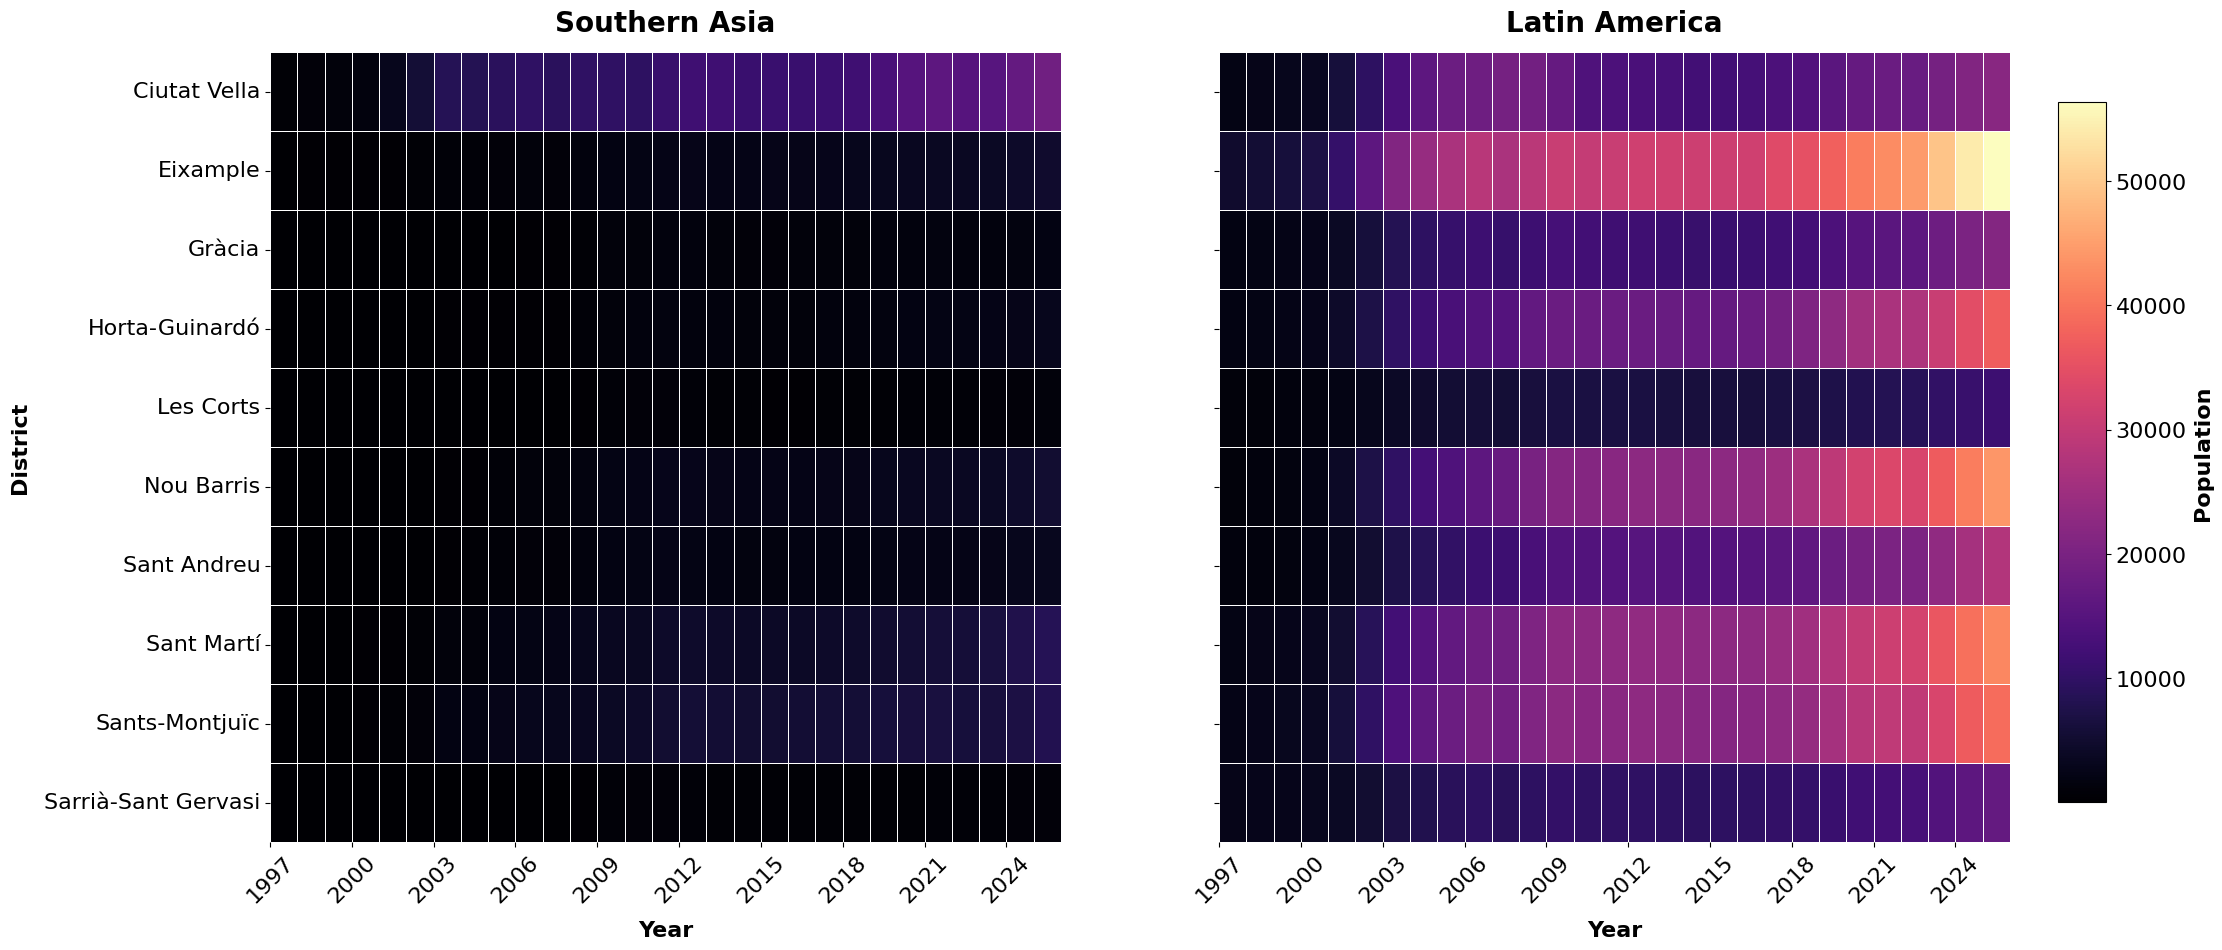

In [19]:
# Set up professional style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with better proportions for two heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
fig.patch.set_facecolor('white')


# Left subplot - All Districts
heat1 = sns.heatmap(
    df_pivot,
    cmap=cmap,
    vmin=vmin, 
    vmax=vmax,
    linewidths=0.5,
    linecolor='white',
    ax=ax1,
    annot=False,
    fmt='.0f',
    cbar=False,
)

ax1.set_xlabel('Year', fontsize=16, fontweight='bold', labelpad=10)
ax1.set_ylabel('District', fontsize=16, fontweight='bold', labelpad=10)
ax1.tick_params(axis='x', rotation=45, labelsize=16)
ax1.tick_params(axis='y', rotation=0, labelsize=16)
ax1.set_title('Southern Asia', fontsize=20, fontweight='bold', pad=15)

# Reduce x-axis ticks - show every 2nd or 3rd year
years = df_pivot.columns
if len(years) > 10:
    # Show every 3rd year if many years
    selected_years = years[::3]
else:
    # Show every 2nd year if moderate number of years
    selected_years = years[::2]
    
ax1.set_xticks([list(years).index(year) for year in selected_years])
ax1.set_xticklabels(selected_years)

# RIGHT SUBPLOT - Ciutat Vella Districts
heat2 = sns.heatmap(
    df_pivot2,
    cmap=cmap,
    vmin=vmin, 
    vmax=vmax,
    linewidths=0.5,
    linecolor='white',
    ax=ax2,
    annot=False,
    fmt='.0f',
    cbar=False,
)

ax2.set_xlabel('Year', fontsize=16, fontweight='bold', labelpad=10)
ax2.set_ylabel('')  # Remove y-axis label
ax2.tick_params(axis='x', rotation=45, labelsize=16)
ax2.tick_params(axis='y', labelleft=False)  # Hide y-axis tick labels
ax2.set_title('Latin America', fontsize=20, fontweight='bold', pad=15)

# Apply same year reduction to right plot
ax2.set_xticks([list(years).index(year) for year in selected_years])
ax2.set_xticklabels(selected_years)

# Colorbar positioned correctly on the right side
plt.subplots_adjust(right=0.85)  # Make space on the right for colorbar
cax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height] in figure coordinates
cbar = fig.colorbar(heat1.collections[0], cax=cax)
cbar.set_label('Population', fontsize=16, fontweight='bold')
cbar.ax.tick_params(labelsize=16)

plt.subplots_adjust(top=0.90)  # Adjust for the suptitle

# Save figure
plt.savefig('../data/outputs/good/southern_asia_population_heatmap_comparison.png',
            dpi=300, bbox_inches='tight', facecolor='white',
            transparent=False, edgecolor='none')
plt.show()




Logarithmic Scale: